# DS 3000 - Assignment 4

**Student Name**: [Enter your name here]

**Date**: [Enter the date]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2020 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [119]:
#run this cell to install the fast parquet library
!pip install fastparquet


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [120]:
#let's load the data into a dataframe
import pandas as pd
tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (3 pts) 
Inspect the data to: 1) identify its dimensions, and 2) indicate if the variables have suitable types.

In [121]:
print("dimnesions:", tripdata_df.shape) #print the shape of the dataframe
print("data types:\n", tripdata_df.dtypes) #print the data types of the dataframe
# Some variables do not have correct types - "store_and_fwd_flag" should be a string, while "payment_type", "Ratecodeid", 
# "passenger_count", and "trip_type" should be integers.


dimnesions: (398632, 20)
data types:
 VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object


## 3. Missing Values (5 pts) 
Evaluate the frequency of missing values in the dataset. Are missing values an isolated case or a widespread issue? What method would you recommend to handle missing data?

In [122]:
tripdata_df.isnull().sum() #check for frequency of missing values
# The missing values are a widespread problem in the dataset, as they are present almost everywhere.
# To handle the missing values, I would recommend deleting the rows(observations) with missing values, as the number of missing values is not too high.

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        80893
RatecodeID                80893
PULocationID                  0
DOLocationID                  0
passenger_count           80893
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                398632
improvement_surcharge         0
total_amount                  0
payment_type              80893
trip_type                 80894
congestion_surcharge      80893
dtype: int64

## 4. Types of Data (5 pts) 
Are there any categorical data in this dataset. If they exist, identify at least two variables and indicate if  they are nominal or ordinal (hint: read the data dictionary above which describes all field in the data)

In [123]:
# There are multiple occurences of categorical data in the dataset
# some examples are: VendorID, RatecodeID, Payment_type, Store_and_fwd_flag
# all of these are nominal categorical data, as they do not have any order or rank associated with them.

## 5. Invalid Data (5 pts) 
Explore the data to determine if there are any invalid values. Demonstrate at least three issues that you found.

In [124]:
# The field listed as "ehail_fee" is not present in the data dictionary, and each value is null so I would recommend dropping this field.
print(tripdata_df.loc[:, 'ehail_fee'])
# The field "congestion_surcharge" is not present in the data dictionary, and would be invalid
print(tripdata_df.loc[:, 'congestion_surcharge'])
# Some of the trip total amounts are negative, which is not possible. I would recommend dropping these rows.
tripdata_df.loc[tripdata_df.loc[:, 'total_amount'] < 0, :]


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
398627   NaN
398628   NaN
398629   NaN
398630   NaN
398631   NaN
Name: ehail_fee, Length: 398632, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
398627    NaN
398628    NaN
398629    NaN
398630    NaN
398631    NaN
Name: congestion_surcharge, Length: 398632, dtype: float64


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
225,2,2020-02-01 00:46:14,2020-02-01 00:48:00,N,1.0,77,77,1.0,0.43,-3.50,-0.50,-0.5,0.00,0.0,NaN,-0.3,-4.80,3.0,1.0,0.0
683,2,2020-02-01 01:32:39,2020-02-01 01:34:32,N,5.0,134,134,1.0,0.00,-25.00,0.00,0.0,0.00,0.0,NaN,0.0,-25.00,4.0,2.0,0.0
996,2,2020-02-01 02:45:38,2020-02-01 02:46:06,N,1.0,7,7,1.0,0.11,-2.50,-0.50,-0.5,0.00,0.0,NaN,-0.3,-3.80,3.0,1.0,0.0
1043,2,2020-02-01 02:42:26,2020-02-01 02:44:45,N,1.0,7,7,1.0,0.51,-4.00,-0.50,-0.5,0.00,0.0,NaN,-0.3,-5.30,3.0,1.0,0.0
1086,2,2020-02-01 02:05:00,2020-02-01 02:08:33,N,1.0,41,41,1.0,0.50,-4.50,-0.50,-0.5,0.00,0.0,NaN,-0.3,-5.80,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372143,2,2020-02-20 14:03:00,2020-02-20 14:28:00,None,NaN,185,168,NaN,5.59,-40.78,0.00,0.5,3.98,0.0,NaN,0.3,-36.00,NaN,NaN,NaN
372617,2,2020-02-20 16:06:00,2020-02-20 16:21:00,None,NaN,181,181,NaN,0.91,-32.91,2.75,0.0,0.00,0.0,NaN,0.3,-29.86,NaN,NaN,NaN
394865,2,2020-02-28 11:47:10,2020-02-28 11:50:00,None,NaN,242,242,NaN,0.13,-15.75,0.00,0.5,0.00,0.0,NaN,0.3,-15.25,NaN,NaN,NaN
396278,2,2020-02-28 18:13:00,2020-02-28 18:20:00,None,NaN,35,76,NaN,0.87,-46.05,2.75,0.0,0.00,0.0,NaN,0.3,-43.00,NaN,NaN,NaN


## 6. Data Preparation (15 pts) 
Based on the issues that you identified in questions 2, 3 & 5 above, perform the appropriate steps to clean the data and prepare the data for analysis. 


In [125]:
#Handle missing data -- deletion
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 4] #delete rows with 4 or more missing variables (in each row)
tripdata_df.drop(columns = ['ehail_fee', 'congestion_surcharge']) #drop the columns with missing values

tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('str') #convert the data type of the column to string
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('int') #convert the data type of the column to integer
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('int') #convert the data type of the column to integer
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype('int') #convert the data type of the column to integer
tripdata_df['trip_type'] = tripdata_df['trip_type'].fillna(0).astype('int') #convert the data type of the column to integer

tripdata_df = tripdata_df[tripdata_df['total_amount'] > 0] #remove the observations where the total amount is negative

## 7. Data Analysis (10 pts)
Answer the following question using the prepared data. What is the most expensive and least expensive trip in this dataset and how far did they travel? Explain the results.

In [126]:
tripdata_df.sort_values(by='total_amount', ascending=False)
# The most expensive trip was 641.20, and they traveled for 1.10 miles. The reason that that trip was so expensive is because the tip amount was large
# the least expensive trip was 0.01, and they traveled for 2.8 miles.

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
71544,1,2020-02-07 16:15:33,2020-02-07 16:27:18,N,1,25,97,1,1.10,8.50,1.0,0.5,641.20,0.0,NaN,0.3,651.50,1,1,0.0
15818,2,2020-02-02 14:51:34,2020-02-03 05:53:20,N,1,55,11,6,5.03,458.00,0.0,0.5,0.00,0.0,NaN,0.3,458.80,2,1,0.0
227994,2,2020-02-22 01:58:15,2020-02-22 03:43:38,N,4,130,265,1,89.66,429.50,0.5,0.5,0.00,0.0,NaN,0.3,430.80,2,1,0.0
200842,2,2020-02-19 18:36:18,2020-02-20 08:30:26,N,1,41,74,1,4.90,421.50,1.0,0.5,0.00,0.0,NaN,0.3,423.30,2,1,0.0
119977,2,2020-02-12 06:51:28,2020-02-12 20:27:18,N,1,78,254,1,4.96,414.50,0.0,0.5,0.00,0.0,NaN,0.3,415.30,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213727,2,2020-02-20 20:25:27,2020-02-20 20:26:23,N,5,7,7,1,0.00,0.01,0.0,0.0,0.00,0.0,NaN,0.3,0.31,1,2,0.0
24691,2,2020-02-03 12:27:21,2020-02-03 12:27:50,N,5,212,212,1,0.00,0.00,0.0,0.0,0.00,0.0,NaN,0.3,0.30,2,2,0.0
87782,2,2020-02-08 21:19:06,2020-02-08 21:19:10,N,5,35,35,0,0.00,0.00,0.0,0.0,0.00,0.0,NaN,0.3,0.30,2,1,0.0
22034,2,2020-02-03 08:48:22,2020-02-03 08:48:40,N,5,32,32,1,0.00,0.15,0.0,0.0,0.03,0.0,NaN,0.0,0.18,1,2,0.0


## 8. Data Visualization (5 pts) 
Create bar charts that show: 1) the most common way that New Yorkers request/hail a cab and 2) the most common drop-off location (display the top 5 locations). Explain the charts.

<AxesSubplot: title={'center': 'How New Yorkers Request Cabs'}>

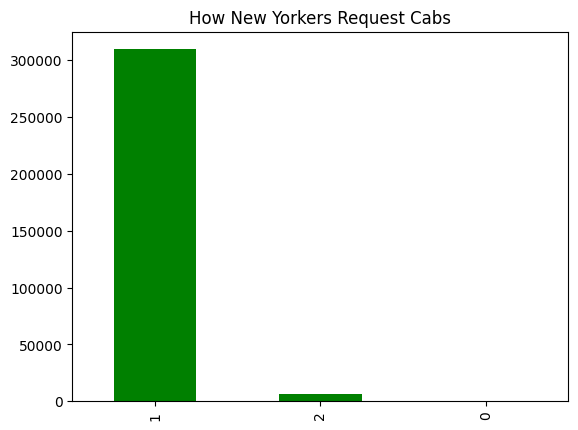

In [114]:
request_cab = tripdata_df['trip_type'].value_counts().head()
request_cab.plot(kind='bar', title='How New Yorkers Request Cabs', color='green')





## Most of the trips were requested by hailing a cab from the street, and only a small fraction of the trips were requested by dispatcching a cab. 1 on the graph's x axis represents street-hail, and 2 represents dispatch

<AxesSubplot: >

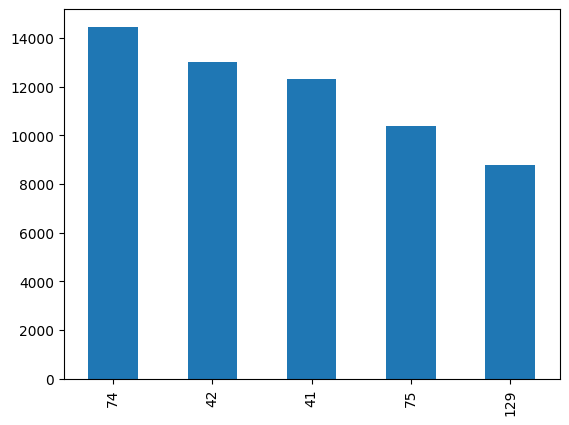

In [95]:
drop_off = tripdata_df['DOLocationID'].value_counts().head(5)
drop_off.plot(kind='bar')

## this bar chart shows the 5 most common drop off locations from cabs. It displays the locations by their drop off ID. 

## 9. Findings (2 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

### I think its that the data is a viable source of information, but it is not the best source of information. About 22% of the data is missing, and that is not enough to make it not viable. I think as more entries get recorded, the data will only become stronger. After the invalid data is removed, the data becomes a good representation of how New Yorkers use taxis. 